<a href="https://colab.research.google.com/github/Sumit-321/The-Sparks-Foundation_GRIP-tasks/blob/main/EDA_of_Urinary_Tract_Infection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uploading files from my computer
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [32]:
# Importing the libraries
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
# Importing our dataset
data = pandas.read_csv('/content/gdrive/My Drive/Datasets/UTI.csv')
# Data shuffling
data= data.sample(frac= 1)
data.columns

Index(['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain',
       'Urine pushing (continuous need for urination)', 'Micturition pains',
       'Burning of urethra, itch, swelling of urethra outlet',
       'Inflammation of urinary bladder', 'Nephritis of renal pelvis origin'],
      dtype='object')

In [33]:
#Renaming the columns
data.rename(columns= {'Temperature of patient':'Temperature'}, inplace= True)
data.rename(columns= {'Occurrence of nausea': 'nausea'}, inplace= True)
data.rename(columns= {'Urine pushing (continuous need for urination)': 'Urine pushing'}, inplace= True)
data.rename(columns= {'Burning of urethra, itch, swelling of urethra outlet': 'Burning'}, inplace= True)
data.rename(columns= {'Inflammation of urinary bladder': 'Inflammation in urinary bladder'}, inplace= True)

In [34]:
data.columns

Index(['Temperature', 'nausea', 'Lumbar pain', 'Urine pushing',
       'Micturition pains', 'Burning', 'Inflammation in urinary bladder',
       'Nephritis of renal pelvis origin'],
      dtype='object')

In [35]:
# 1 for yes and 0 for no.
data['nausea']= data['nausea'].map({'no': 0, 'yes': 1})
data['Lumbar pain']= data['Lumbar pain'].map({'no': 0, 'yes': 1})
data['Urine pushing']= data['Urine pushing'].map({'no': 0, 'yes': 1})
data['Micturition pains']= data['Micturition pains'].map({'no': 0, 'yes': 1})
data['Burning']= data['Burning'].map({'no': 0, 'yes': 1})
data['Inflammation in urinary bladder']= data['Inflammation in urinary bladder'].map({'no': 0, 'yes': 1})
data['Nephritis of renal pelvis origin']= data['Nephritis of renal pelvis origin'].map({'no': 0, 'yes': 1})

In [36]:
data.head()

,Temperature,nausea,Lumbar pain,Urine pushing,Micturition pains,Burning,Inflammation in urinary bladder,Nephritis of renal pelvis origin
52,37.8,0,1,0,0,0,0,0
76,40.0,1,1,0,1,0,0,1
68,39.4,0,1,1,0,1,0,1
70,40.0,1,1,1,1,1,1,1
30,37.1,0,0,1,0,0,1,0


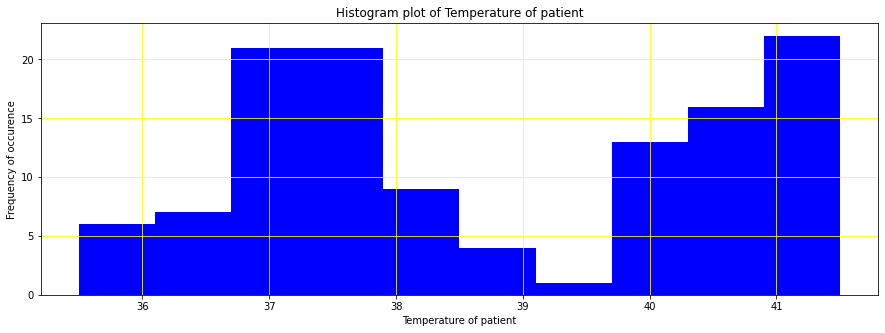

In [46]:
plt.figure(figsize= (15,5))
plt.hist(data['Temperature'], color= 'blue')
plt.title('Histogram plot of Temperature of patient')
plt.xlabel('Temperature of patient')
plt.ylabel('Frequency of occurence')
plt.grid(color= 'yellow')
plt.show()

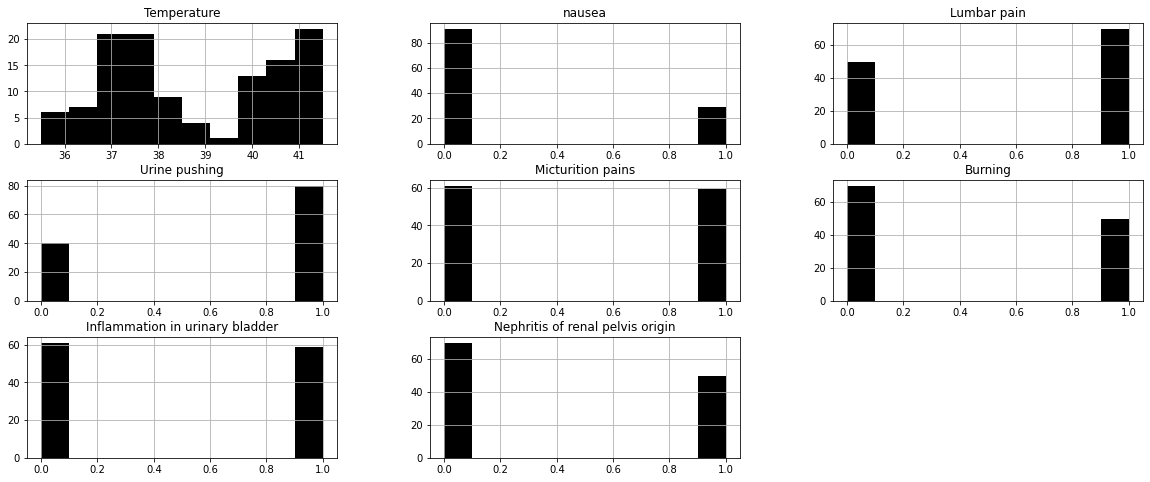

In [47]:
data.hist(figsize= (20, 8), color= 'black')
plt.show()

In [48]:
data.nunique()

Temperature                         44
nausea                               2
Lumbar pain                          2
Urine pushing                        2
Micturition pains                    2
Burning                              2
Inflammation in urinary bladder      2
Nephritis of renal pelvis origin     2
dtype: int64

In [49]:
# Checking null values
data.isnull().sum()

Temperature                         0
nausea                              0
Lumbar pain                         0
Urine pushing                       0
Micturition pains                   0
Burning                             0
Inflammation in urinary bladder     0
Nephritis of renal pelvis origin    0
dtype: int64

In [51]:
# Checking duplicate values
data.duplicated().sum()
# As dataset is small, so I am not deleting these duplicate rows.

21

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 52 to 40
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temperature                       120 non-null    float64
 1   nausea                            120 non-null    int64  
 2   Lumbar pain                       120 non-null    int64  
 3   Urine pushing                     120 non-null    int64  
 4   Micturition pains                 120 non-null    int64  
 5   Burning                           120 non-null    int64  
 6   Inflammation in urinary bladder   120 non-null    int64  
 7   Nephritis of renal pelvis origin  120 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 8.4 KB


In [61]:
correlation= data.corr()
correlation

,Temperature,nausea,Lumbar pain,Urine pushing,Micturition pains,Burning,Inflammation in urinary bladder,Nephritis of renal pelvis origin
Temperature,1.000000,0.593152,0.391971,-0.018866,0.060493,0.037245,-0.236718,0.737055
nausea,0.593152,1.000000,0.477105,-0.013765,0.574007,-0.121744,0.184630,0.667947
Lumbar pain,0.391971,0.477105,1.000000,-0.239046,-0.183142,0.028571,-0.521251,0.714286
Urine pushing,-0.018866,-0.013765,-0.239046,1.000000,0.341816,0.597614,0.695418,0.239046
Micturition pains,0.060493,0.574007,-0.183142,0.341816,1.000000,0.149331,0.666574,0.149331
Burning,0.037245,-0.121744,0.028571,0.597614,0.149331,1.000000,0.149331,0.314286
Inflammation in urinary bladder,-0.236718,0.184630,-0.521251,0.695418,0.666574,0.149331,1.000000,-0.188777
Nephritis of renal pelvis origin,0.737055,0.667947,0.714286,0.239046,0.149331,0.314286,-0.188777,1.000000


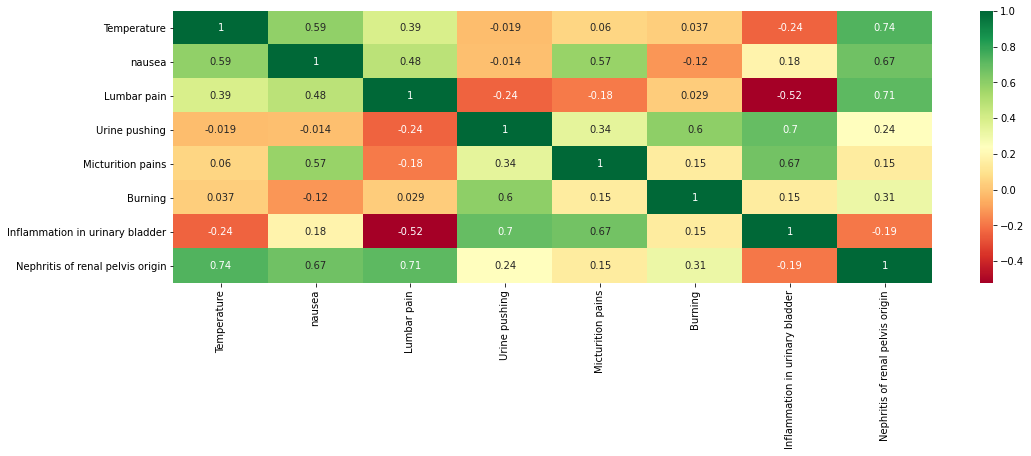

In [68]:
plt.figure(figsize= (17, 5))
seaborn.heatmap(correlation, annot= True, cmap= 'RdYlGn')
plt.show()

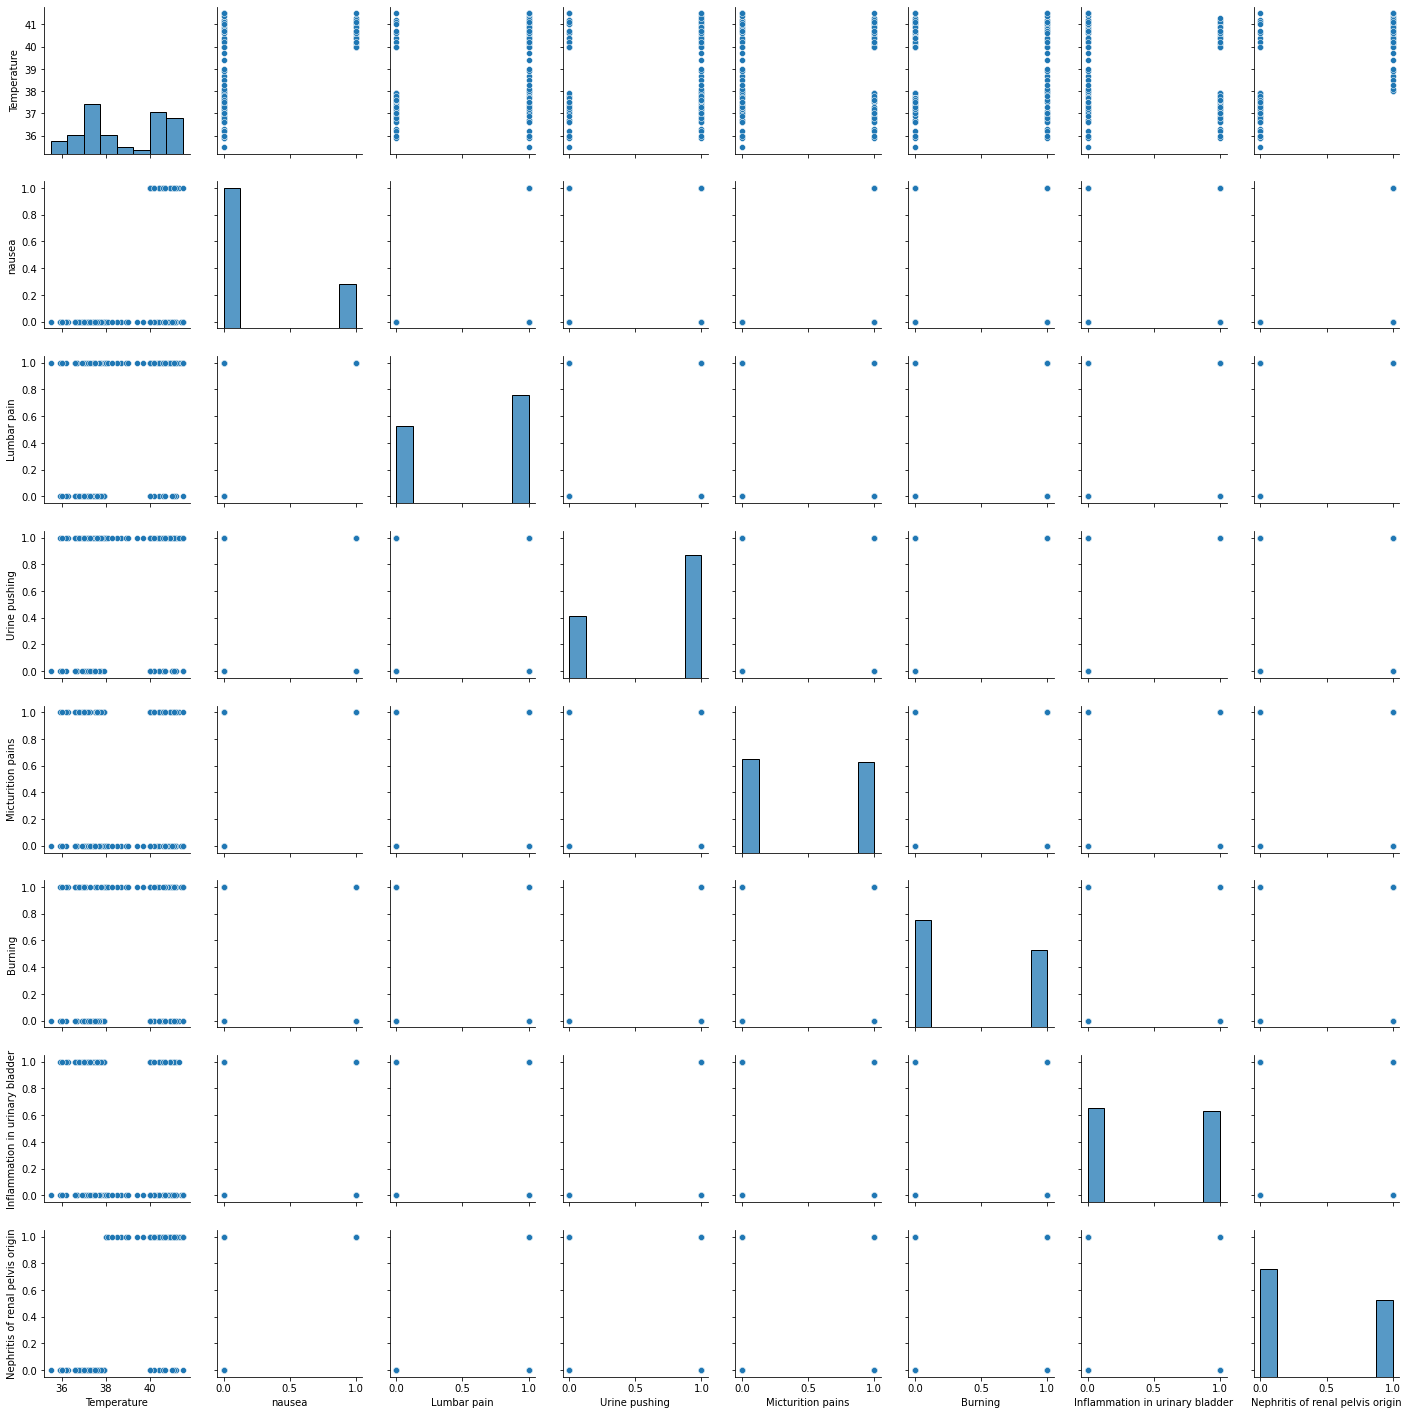

In [69]:
seaborn.pairplot(data)
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [56]:
x= data[['Temperature', 'nausea', 'Lumbar pain', 'Urine pushing','Micturition pains', 'Burning', 'Inflammation in urinary bladder']]
y= data[['Nephritis of renal pelvis origin']]
dtc= DecisionTreeClassifier()
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.05, random_state= 0)
dtc.fit(x_train, y_train)
print('Shape of training set is : ', x_train.shape)
print('Shape of testing set is : ', x_test.shape)
y_pred= dtc.predict(x_test)

Shape of training set is :  (114, 7)
Shape of testing set is :  (6, 7)


In [57]:
print('Confusion matrix is : ', '\n' , confusion_matrix(y_test, y_pred))
print('Accuracy score on training set : ', dtc.score(x_train, y_train))
print('Accuracy score on testing set : ', dtc.score(x_test, y_test))

Confusion matrix is :  
 [[5 0]
 [0 1]]
Accuracy score on training set :  1.0
Accuracy score on testing set :  1.0


In [59]:
# Prediction from our model :
print('Enter 0 for no and 1 for yes.')
a= float(input('Enter body temperature of patient : '))
b= int(input('Does patient has nausea ? '))
c= int(input('Does patient has Lumbar pain ? '))
d= int(input('Does patient has Urine pushing problem ? '))
e= int(input('Does patient has Micturition pains ? '))
f= int(input('Does patient has Burning problem ? '))
g= int(input('Does patient has Inflammation of urinary bladder ? '))
input= [a, b, c, d, e, f, g]
prediction= dtc.predict([input])
prediction
if prediction== 0:
    print('Prediction of Nephritis of renal pelvis origin is : Negative.')
else:
    print('Prediction of Nephritis of renal pelvis origin is : Positive.')

Enter 0 for no and 1 for yes.
Enter body temperature of patient : 38.1
Does patient has nausea ? 0
Does patient has Lumbar pain ? 1
Does patient has Urine pushing problem ? 0
Does patient has Micturition pains ? 0
Does patient has Burning problem ? 1
Does patient has Inflammation of urinary bladder ? 1
Prediction of Nephritis of renal pelvis origin is : Positive.


In [70]:
# Viewing whole dataset at once
pandas.set_option("display.max_rows", None, "display.max_columns", None)
data

,Temperature,nausea,Lumbar pain,Urine pushing,Micturition pains,Burning,Inflammation in urinary bladder,Nephritis of renal pelvis origin
52,37.8,0,1,0,0,0,0,0
76,40.0,1,1,0,1,0,0,1
68,39.4,0,1,1,0,1,0,1
70,40.0,1,1,1,1,1,1,1
30,37.1,0,0,1,0,0,1,0
23,37.0,0,0,1,1,1,1,0
16,36.8,0,0,1,1,1,1,0
101,41.0,1,1,1,1,1,1,1
10,36.6,0,0,1,1,1,1,0
103,41.0,1,1,0,1,0,0,1
